In [483]:
# Importación de librerías y configuraciones necesarias
library(ggplot2)
library(dplyr)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [484]:
# Lectura del CSV
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [485]:
# Primeros registros del DataFrame (6 primeros)
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [486]:
# Guardado de palabras en un vector
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

# Asignación de las palabras del vector como nombres de campos al DataFrame
names(airbnb) <- newnames

In [487]:
# Nombres de los campos
names(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [488]:
# Añadido del nuevo campo "PiesCuadrados" al DataFrame
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

# Primeros registros del DataFrame (6 primeros)
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [489]:
# Asignación a NA a todos aquellos que están mal estructurados
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == ''] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == ' '] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '-'] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '28'] <- NA
levels(airbnb$CodigoPostal)[!startsWith(levels(airbnb$CodigoPostal),'28')] <- NA

# Asignación de Valores correspondientes a todos los que están mal estructurados
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '28002\n20882'] <- '28002'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '28051\n28051'] <- '28051'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '28002\n28002'] <- '28002'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == 'Madrid 28004'] <- '28004'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '280013'] <- '28013'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '2804'] <- '28004'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '2805'] <- '28005'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) == '2815'] <- '28015'

# Resumen campo de Codigos postales
summary(airbnb$CodigoPostal)

28001 28013 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 
  231  1020   171   185  1795  1195   218   206   338   216   384   250  2060 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850  NA's 
   85    12    12     1     1     1     1     1     1   448

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [490]:
# Resumen campos de Codigos Postales
table(airbnb$CodigoPostal)


28001 28013 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 
  231  1020   171   185  1795  1195   218   206   338   216   384   250  2060 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [491]:
# Códigos Postales con mayor cantidad de entradas
head(sort(table(airbnb$CodigoPostal), decreasing = TRUE), 5)

# Códigos Postales con menor cantidad de entradas
head(sort(table(airbnb$CodigoPostal)), 5)


28012 28004 28005 28013 28014 
 2060  1795  1195  1020   630 


28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [492]:
# Barrios que hay con el Código Postal "28012"
na.omit(unique(airbnb$Barrio[airbnb$CodigoPostal == '28012']))

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
attr(,"na.action")
[1] 3
attr(,"class")
[1] omit
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [493]:
# Entradas en cada Barrio para el Código Postal "28012"
sort(table(airbnb$Barrio[airbnb$CodigoPostal == '28012']), decreasing = TRUE)


                 Embajadores                          Sol 
                        1449                          301 
                      Cortes              Palos de Moguer 
                         216                           46 
                     Palacio                      Acacias 
                          27                           13 
                 Universidad                     Arapiles 
                           4                            1 
                      Atocha                     Delicias 
                           1                            1 
                        Goya                     Abrantes 
                           1                            0 
                     Adelfas                   Aeropuerto 
                           0                            0 
                     Aguilas             Alameda de Osuna 
                           0                            0 
                     Almagro                     Almena

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [494]:
# Cuantos barrios hay en todo el Dataset
length(unique(airbnb$Barrio))

# Cuales barrios que hay en todo el Dataset
unique(airbnb$Barrio)

[1] 125

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [495]:
# 5 barrios con mayor número de entradas
head(sort(table(airbnb$Barrio), decreasing = TRUE), 5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [496]:
# Cuantos tipos de alquiler hay
length(unique(airbnb$TipoAlquiler))

# Cuales tipos de alquiler que hay
unique(airbnb$TipoAlquiler)

# Cuantas entradas en el DataFrame hay por cada tipo
table(airbnb$TipoAlquiler)

[1] 3

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


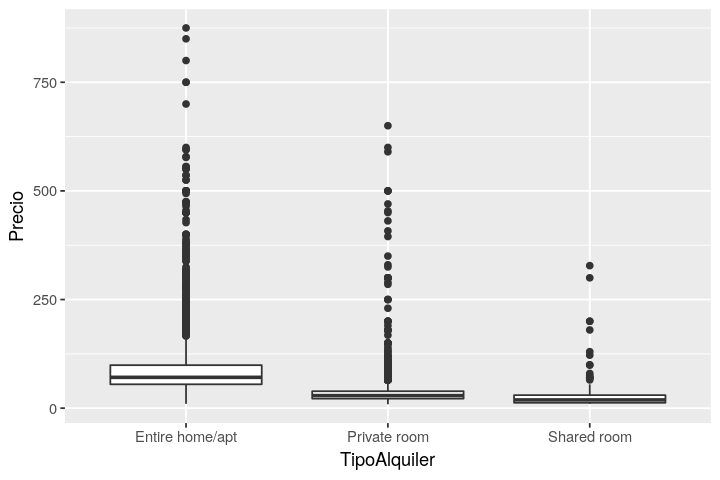

In [497]:
# Diagrama de caja del precio en función del tipo de alquiler
ggplot(airbnb, aes(x=TipoAlquiler, y=Precio)) + # Dibujo del lienzo de trabajo
geom_boxplot() # Dibujo del boxplot

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [498]:
# Precio medio por tipo de alquiler
by(airbnb$Precio, airbnb$TipoAlquiler, mean, na.rm = TRUE)

# La diferencia que hay es estadísticamente significativa?
kruskal.test(Precio ~ TipoAlquiler, data = airbnb)
print('La diferencia de media de los precios de alquiler es estadísticamente significativa, pues p-value < 0.05')

# Que test se podría utilizar para comprobarlo?
print('El test utilizado es el test de Kruskal-Wallis')

airbnb$TipoAlquiler: Entire home/apt
[1] 87.29661
------------------------------------------------------------ 
airbnb$TipoAlquiler: Private room
[1] 34.25514
------------------------------------------------------------ 
airbnb$TipoAlquiler: Shared room
[1] 29.8534


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "La diferencia de media de los precios de alquiler es estadísticamente significativa, pues p-value < 0.05"
[1] "El test utilizado es el test de Kruskal-Wallis"


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [499]:
# Filtrado del DataFrame airbnb por el tipo de alquiler "Entire home/apt"
airbnb_entire <- filter(airbnb, TipoAlquiler == 'Entire home/apt')

# Primeros registros del DataFrame (Primeros 6)
head(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
2,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
3,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
4,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
5,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
6,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [500]:
# 5 barrios con mayor número de apartamentos en alquiler
# (Probablemente hubiese sido mejor usar el "%>%" de dplyr)
head(sort(table(airbnb_entire$Barrio[airbnb_entire$TipoPropiedad == 'Apartment']), decreasing = TRUE), 5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1099         897         684         648         528 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [501]:
# Los 5 barrios que tienen mayor precio medio de alquiler junto con su precio.
head(sort(by(airbnb_entire$Precio, airbnb_entire$Barrio, mean, na.rm=TRUE), decreasing=TRUE), 5)

# Con aggregate
#barrio_precioMedio <- aggregate(airbnb_entire$Precio, list(airbnb_entire$Barrio), mean, na.rm=TRUE)
#colnames(barrio_precioMedio) <- c('Barrio', 'PrecioMedio')
#barrio_precioMedio

airbnb_entire$Barrio
      Palomas Fuentelareina     Recoletos    El Plantío    Castellana 
     309.7500      180.0000      161.9254      150.0000      141.3889

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [502]:
# Definición de un nuevo DataFrame con solo las entradas de "apartamentos" en "airbnb_entire"
airbnb_entire_apt <- filter(airbnb_entire, TipoPropiedad == 'Apartment')

# Cantidad de apartamentos por barrio
apt_by_barrio <- as.data.frame(table(airbnb_entire_apt$Barrio))
colnames(apt_by_barrio)[1] <- 'Barrio'
print('Apartamentos por Barrio')
apt_by_barrio

# Alternativa para conseguir los apartamentos por barrio
#by(airbnb_entire_apt$TipoPropiedad, airbnb_entire_apt$Barrio, length)

# Dataframe con el nombre del barrio, el precio y el número de entradas
barrio_precio_entrada <- merge(barrio_precioMedio, apt_by_barrio, by='Barrio')
print('Barrio, precio y número de entradas')
barrio_precio_entrada



[1] "Apartamentos por Barrio"


Barrio,Freq
<fct>,<int>
Abrantes,3
Acacias,56
Adelfas,27
Aeropuerto,2
Aguilas,2
Alameda de Osuna,2
Almagro,87
Almenara,22
Almendrales,12


[1] "Barrio, precio y número de entradas"


Barrio,PrecioMedio,Freq
<fct>,<dbl>,<int>
Abrantes,46.00000,3
Acacias,68.16393,56
Adelfas,68.72727,27
Aeropuerto,38.00000,2
Aguilas,54.50000,2
Alameda de Osuna,138.75000,2
Almagro,109.18557,87
Almenara,65.68000,22
Almendrales,77.50000,12


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [503]:
# 5 barrios con mayor precio y más de 100 entradas
freq100 <- filter(barrio_precio_entrada, Freq>100)
top5_freq100 <- head(arrange(freq100, desc(PrecioMedio)), 5)
top5_freq100

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
1,Recoletos,161.92537,122
2,Goya,111.33803,122
3,Sol,100.75036,648
4,Trafalgar,98.57848,203
5,Justicia,98.25468,486


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message in `==.default`(airbnb_entire$Barrio, top5_freq100$Barrio):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


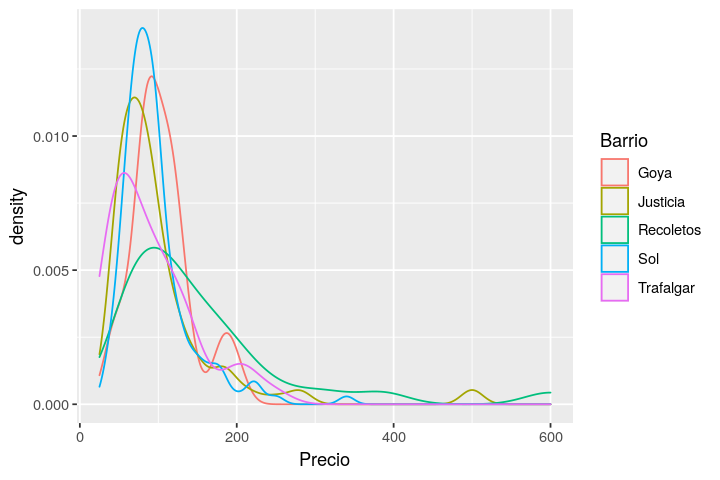

In [504]:
# Dibujo del lienzo de trabajo
ggplot(airbnb_entire[airbnb_entire$Barrio == top5_freq100$Barrio,], aes(x=Precio, color=Barrio)) +
# Dibujo del diagrama de densidad
geom_density()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [505]:
# Definición top barrios de airbnb_entire
top <- airbnb_entire[airbnb_entire$Barrio %in% top5_freq100$Barrio,]

# Agrupación del promedio de metros cuadrados del top 5 barrios
prom_MetrosCuadrados <- aggregate(top$MetrosCuadrados, list(top$Barrio), mean, na.rm=TRUE)

# Cambio de nombre a columnas para posterior join
colnames(prom_MetrosCuadrados) <- c('Barrio','Media_MetrosCuadrados')

# Join
top5_freq100_m2 <- merge(top5_freq100, prom_MetrosCuadrados, by='Barrio')
top5_freq100_m2

Barrio,PrecioMedio,Freq,Media_MetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,122,51.68504
Justicia,98.25468,486,28.52669
Recoletos,161.92537,122,26.66316
Sol,100.75036,648,45.61692
Trafalgar,98.57848,203,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message in `==.default`(airbnb_entire$Barrio, top5_freq100_m2$Barrio):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message:
“Removed 332 rows containing non-finite values (stat_density).”


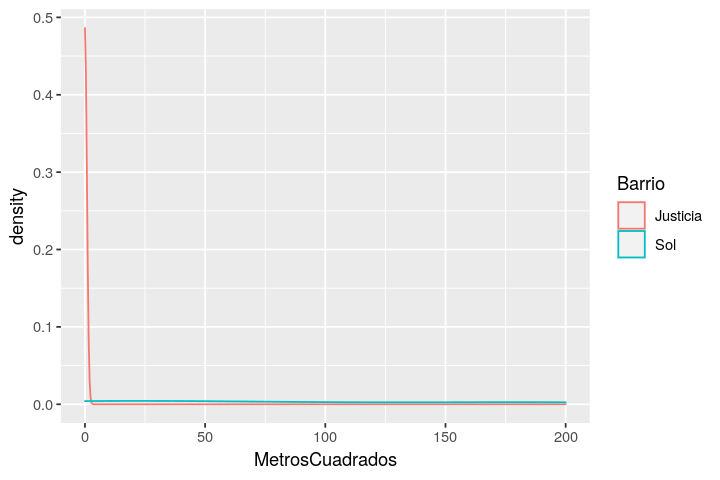

In [506]:
# Dibujo del lienzo de trabajo
ggplot(airbnb_entire[airbnb_entire$Barrio == top5_freq100_m2$Barrio,], aes(x=MetrosCuadrados, color=Barrio)) +
#Dibujo del diagrama de densidad
geom_density()

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [507]:
# Comprobación de que las medias de los metros cuadrados son diferentes
kruskal.test(Media_MetrosCuadrados~Barrio, data=top5_freq100_m2)

# Conclusión del ejercicio
print('Como el p-value > 0.05, no se tiene evidencia estadística suficiente para afirmar que son diferentes')
print('Test utilizado: Kruskal-Wallis')


	Kruskal-Wallis rank sum test

data:  Media_MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 4, df = 4, p-value = 0.406


[1] "Como el p-value > 0.05, no se tiene evidencia estadística suficiente para afirmar que son diferentes"
[1] "Test utilizado: Kruskal-Wallis"


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

`geom_smooth()` using formula 'y ~ x'



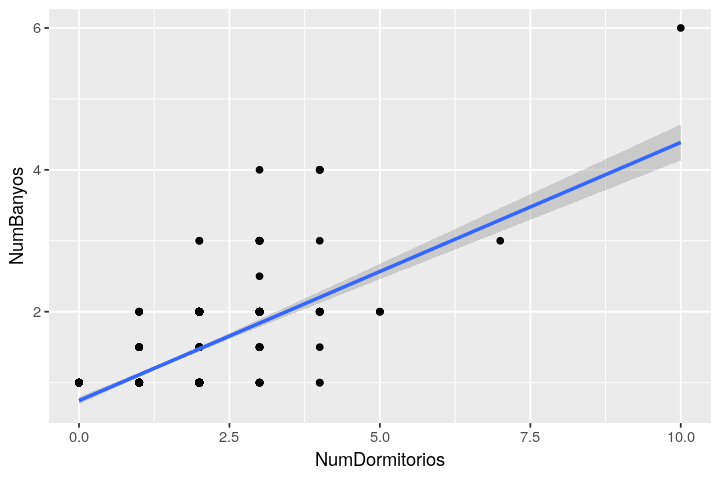

In [508]:
# Filtrado del DataFrame por barrio "Sol"
barrio_sol <- subset(airbnb_entire, Barrio == 'Sol')

# Dibujo lienzo de trabajo
ggplot(barrio_sol, aes(x=NumDormitorios, y=NumBanyos)) +
# Dibujo scatter plot
geom_point() +
# Dibujo modelo lineal
geom_smooth(method=lm)

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [509]:
# Matriz de correlación de las cuatro variables seleccionadas
cor(barrio_sol[c('NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')],use='pairwise.complete.obs')

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que no tienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


[1] "Como la correlación es baja no se puede confiar en que haya relación entre el números de dormitorios y los metros cuadrados"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



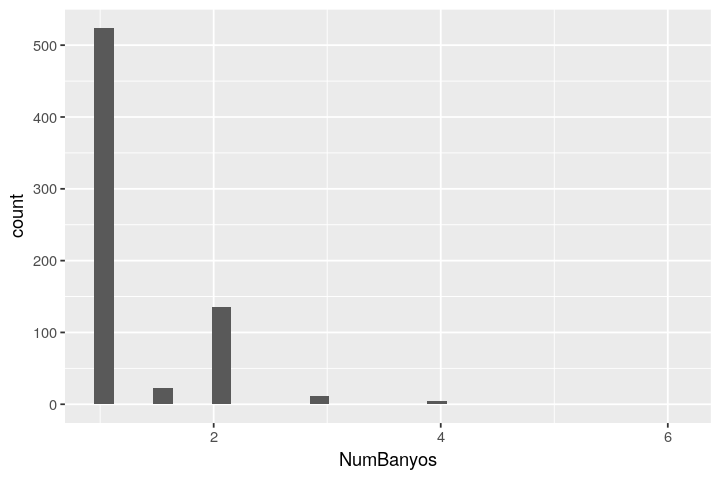

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



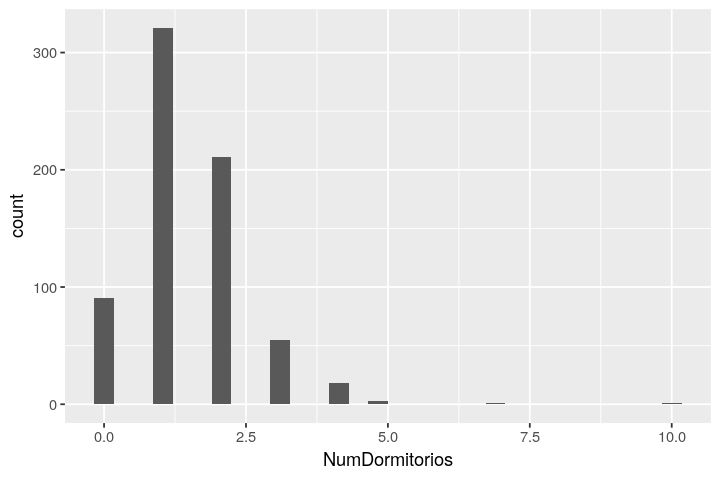

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”


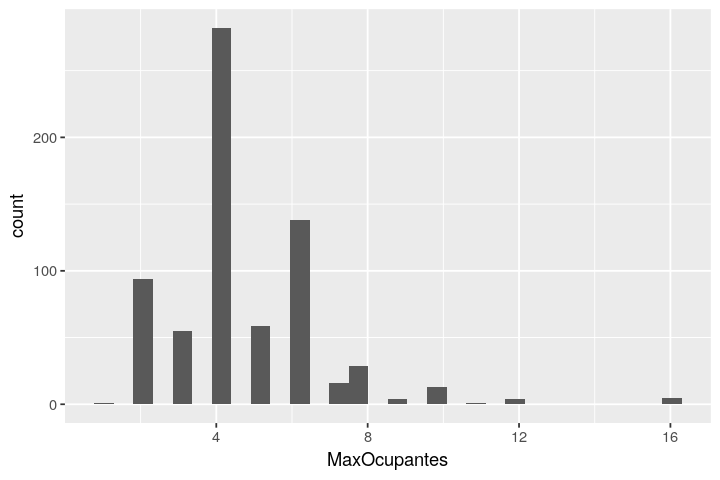

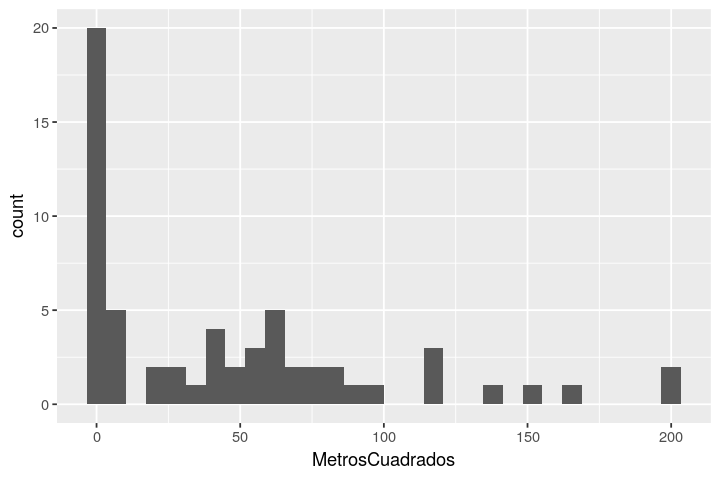

In [510]:
# Son de fiar estos números?
print(paste('Como la correlación es baja', 
            'no se puede confiar en que haya relación',
            'entre el números de dormitorios y', 'los metros cuadrados'))

# Histograma NumBanyos
ggplot(barrio_sol, aes(x=NumBanyos)) + geom_histogram()

# Histograma NumDormitorios
ggplot(barrio_sol, aes(x=NumDormitorios)) + geom_histogram()

# Histograma MaxOcupantes
ggplot(barrio_sol, aes(x=MaxOcupantes)) + geom_histogram()

# Histograma MetrosCuadrados
ggplot(barrio_sol, aes(x=MetrosCuadrados)) + geom_histogram()

In [511]:
# Filtro de outliers
barrio_sol <- barrio_sol[barrio_sol$NumDormitorios < 5.5,]
barrio_sol <- barrio_sol[barrio_sol$MaxOcupantes < 14,]
barrio_sol <- barrio_sol[barrio_sol$MetrosCuadrados > 5 & barrio_sol$MetrosCuadrados < 160,]

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [512]:
# Matriz de correlación de las cuatro variables seleccionadas, habiendo eliminando los outliers
cor(barrio_sol[c('NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')],use='pairwise.complete.obs')

# Modelo que permita calcular de mejor manera el precio del inmueble
modelo <- lm(data=barrio_sol, formula=Precio~NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
# Resumen estadístico del modelo
summary(modelo)
# Intervalo de confianza
confint(modelo)

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7546596,0.8511014,0.5702399
NumDormitorios,0.7546596,1.0000000,0.8360971,0.7139575
MaxOcupantes,0.8511014,0.8360971,1.0000000,0.8013169
MetrosCuadrados,0.5702399,0.7139575,0.8013169,1.0000000



Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.344 -16.513  -4.569  19.137  49.057 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.9015    10.8259   3.132  0.00395 ** 
NumBanyos        -3.8512    12.9377  -0.298  0.76808    
NumDormitorios   40.4786     7.9437   5.096 1.94e-05 ***
MaxOcupantes      0.7399     4.8614   0.152  0.88009    
MetrosCuadrados   0.1013     0.2355   0.430  0.67015    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.14 on 29 degrees of freedom
  (637 observations deleted due to missingness)
Multiple R-squared:  0.7782,	Adjusted R-squared:  0.7476 
F-statistic: 25.43 on 4 and 29 DF,  p-value: 4.046e-09


,2.5 %,97.5 %
(Intercept),11.7601360,56.0428636
NumBanyos,-30.3117434,22.6094300
NumDormitorios,24.2318242,56.7253986
MaxOcupantes,-9.2028674,10.6825865
MetrosCuadrados,-0.3802572,0.5829034


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [513]:
# Respuesta a la pregunta
print(paste('La variable más fiable para conocer el precio del inmueble es el número de habitaciones',
           'porque es la variable que tiene el p-value más pequeño'))

[1] "La variable más fiable para conocer el precio del inmueble es el número de habitaciones porque es la variable que tiene el p-value más pequeño"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [514]:
# Modelo de regresión lineal del precio en función de los metros cuadrados
modelo_p_mc <- lm(data=barrio_sol, formula=Precio~MetrosCuadrados)
# Resumen estadístico del modelo
summary(modelo_p_mc)
# Intervalo de confianza al 95%
confint(modelo_p_mc)

# Cuántos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?
print('El precio de alquiler aumenta en 0.9849 euros por cada metro cuadrado adicional del piso')
print('Con una confianza del 95%, el intervalo donde se encuentra el incremento real es: [0.5899918 , 1.379721]')


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.524 -18.687  -3.552   6.679 117.654 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.5801    14.0346   2.464   0.0193 *  
MetrosCuadrados   0.9849     0.1939   5.080 1.57e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.31 on 32 degrees of freedom
  (637 observations deleted due to missingness)
Multiple R-squared:  0.4465,	Adjusted R-squared:  0.4292 
F-statistic: 25.81 on 1 and 32 DF,  p-value: 1.573e-05


,2.5 %,97.5 %
(Intercept),5.9924951,63.167629
MetrosCuadrados,0.5899918,1.379721


[1] "El precio de alquiler aumenta en 0.9849 euros por cada metro cuadrado adicional del piso"
[1] "Con una confianza del 95%, el intervalo donde se encuentra el incremento real es: [0.5899918 , 1.379721]"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [515]:
# Modelo de regresión lineal del precio en función de los metros cuadrados
modelo_p_nd <- lm(data=barrio_sol, formula=Precio~NumDormitorios)
# Resumen estadístico del modelo
summary(modelo_p_nd)
# Intervalo de confianza al 95%
confint(modelo_p_nd)

# Cuántos euros incrementa el precio del alquiler por cada habitación?
print('El precio de alquiler aumenta en 42.448 euros por cada habitación adicional')
print('Con una confianza del 95%, el intervalo donde se encuentra el incremento real es: [34.19252 , 50.70250]')


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.286 -17.476  -3.391  20.997  51.819 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      35.943      7.256   4.953 2.28e-05 ***
NumDormitorios   42.448      4.053  10.474 7.21e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.11 on 32 degrees of freedom
  (637 observations deleted due to missingness)
Multiple R-squared:  0.7742,	Adjusted R-squared:  0.7671 
F-statistic: 109.7 on 1 and 32 DF,  p-value: 7.214e-12


,2.5 %,97.5 %
(Intercept),21.16276,50.72383
NumDormitorios,34.19252,50.70250


[1] "El precio de alquiler aumenta en 42.448 euros por cada habitación adicional"
[1] "Con una confianza del 95%, el intervalo donde se encuentra el incremento real es: [34.19252 , 50.70250]"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [516]:
# Probabilidad de encontrar un apartamento en alquiler con 3 dormitorios
probabilidad <- length(na.omit(barrio_sol$NumDormitorios[barrio_sol$NumDormitorios == 3])) / length(na.omit(barrio_sol$NumDormitorios))
# Respuesta a la pregunta
paste('La probabilidad de encontrar un apartamento en alquiler con 3 dormitorios es de un', 
      round(probabilidad*100,2), '%')

[1] "La probabilidad de encontrar un apartamento en alquiler con 3 dormitorios es de un 5.88 %"

In [517]:
# Intervalo de confianza para la probabilidad de encontrar un apartamento en alquiler con 3 dormitorios
binom.test(length(na.omit(barrio_sol$NumDormitorios[barrio_sol$NumDormitorios == 3])), length(na.omit(barrio_sol$NumDormitorios)))
# Respuesta a la pregunta
paste('Con un 95% de confianza, el intervalo donde se encuentra la verdadera probabilidad de encontrar un',
    'apartamento en alquiler con 3 habitaciones es de [0.72% , 19.68%]')


	Exact binomial test

data:  length(na.omit(barrio_sol$NumDormitorios[barrio_sol$NumDormitorios == 3])) and length(na.omit(barrio_sol$NumDormitorios))
number of successes = 2, number of trials = 34, p-value = 6.938e-08
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.007204917 0.196773209
sample estimates:
probability of success 
            0.05882353 


[1] "Con un 95% de confianza, el intervalo donde se encuentra la verdadera probabilidad de encontrar un apartamento en alquiler con 3 habitaciones es de [0.72% , 19.68%]"